In [15]:
import numpy as np
import matplotlib.pyplot as plt
import featureNormalize as fn
import gradientDescentMulti as gdm
import normalEqn as ne

In [2]:
data = np.loadtxt('ex1data2.txt', delimiter=',')
X = data[:,:2]
y = data[:,2]
m = len(y)

In [3]:
for i in range(10):
    print("x = [{:.0f} {:.0f}], y = {:.0f}".format(X[i,0], X[i,1], y[i]))

x = [2104 3], y = 399900
x = [1600 3], y = 329900
x = [2400 3], y = 369000
x = [1416 2], y = 232000
x = [3000 4], y = 539900
x = [1985 4], y = 299900
x = [1534 3], y = 314900
x = [1427 3], y = 198999
x = [1380 3], y = 212000
x = [1494 3], y = 242500


In [4]:
X_norm, mu, sigma = fn.featureNormalize(X)

In [5]:
X_padded = np.column_stack((np.ones((m,1)), X_norm))

In [6]:
alpha = 0.01
num_iters = 400
theta = np.zeros((3,1))

In [7]:
theta, J_history = gdm.gradientDescentMulti(X_padded, y, theta, alpha, num_iters)

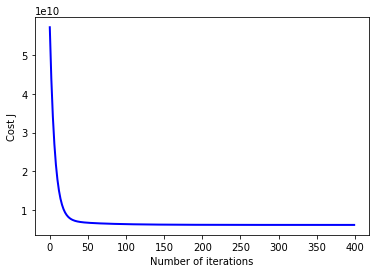

In [8]:
plt.plot(range(J_history.size), J_history, "-b", linewidth=2)
plt.xlabel('Number of iterations')
plt.ylabel('Cost J')
plt.show()

In [9]:
print('Theta computed from gradient descent: ')
print("{:f}, {:f}, {:f}".format(theta[0,0], theta[1,0], theta[2,0]))
print("")

Theta computed from gradient descent: 
45678.665371, -116004.561856, 53835.547557



In [10]:
print(sigma[:,1])

[0.75284281]


In [11]:
area_norm = (1650 - float(mu[:,0])) / float(sigma[:,0])
br_norm = (3 - float(mu[:,1]))/float(sigma[:,1])
house_norm_padded = np.array([1, area_norm, br_norm])

price = np.array(house_norm_padded).dot(theta)

# ============================================================

print("Predicted price of a 1650 sq-ft, 3 br house (using gradient descent):\n ${:,.2f}".format(price[0]))

Predicted price of a 1650 sq-ft, 3 br house (using gradient descent):
 $85,249.93


In [12]:
data = np.loadtxt('ex1data2.txt', delimiter=",")
X = data[:,:2]
y = data[:,2]
m = len(y)

In [13]:
X_padded = np.column_stack((np.ones((m,1)), X))

In [16]:
theta = ne.normalEqn(X_padded, y)

In [17]:
print('Theta computed from the normal equations: ')
print("{:f}, {:f}, {:f}".format(theta[0], theta[1], theta[2]))

Theta computed from the normal equations: 
89597.909544, 139.210674, -8738.019113


In [19]:
house_norm_padded = np.array([1, 1650, 3])
price = np.array(house_norm_padded).dot(theta)
print("Predicted price of a 1650 sq-ft, 3 br house (using gradient descent): \n ${:,.2f}".format(price))

Predicted price of a 1650 sq-ft, 3 br house (using gradient descent): 
 $293,081.46
